# **PFM_05_01 Az előadás felépítése** #



1.   Kétdimenziós rácsháló generálása az np.meshgrid utasítással
2.   Térfogat meghatározása numerikus integrálással (a Balaton víztérfogata)
3. Egy folyó vízhozamának számolása.



#**PFM_05_02: Python alapok**#

##**A numpy.meshgrid utasítás**##

**A numpy.meshgrid utasítás**

A `numpy.meshgrid` függvény két (vagy több) egydimenziós tömbből koordinátarácsot hoz létre.

Bemeneti tömbök: A függvény bemenetként kettő (vagy több) egydimenziós tömböt vár.

Koordinátarács létrehozása: A függvény minden bemeneti tömb minden eleméhez létrehoz egy koordinátát a rácson.

Kimeneti tömbök: A függvény annyi kimeneti tömböt ad vissza, ahány bemeneti tömböt kapott. Minden kimeneti tömb a bemeneti tömbök egyikéhez tartozó koordinátákat tartalmazza.


**Bemutató példa**

Néhány elemből álló rács létrehozása

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-1, 1.5, 0.5)
y = np.arange(-2.0, 1.0, 1.0)
X,Y = np.meshgrid(x, y, indexing="ij")
print(X)
print(f"Az y = {y[0]} lehetséges x koordinátái")
print(X[:,0])
print("")
print(Y)
print(f"Az x= {x[1]} lehetséges y koordinátái")
print(Y[1,:])

[[-1.  -1.  -1. ]
 [-0.5 -0.5 -0.5]
 [ 0.   0.   0. ]
 [ 0.5  0.5  0.5]
 [ 1.   1.   1. ]]
Az y = -2.0 lehetséges x koordinátái
[-1.  -0.5  0.   0.5  1. ]

[[-2. -1.  0.]
 [-2. -1.  0.]
 [-2. -1.  0.]
 [-2. -1.  0.]
 [-2. -1.  0.]]
Az x= -0.5 lehetséges y koordinátái
[-2. -1.  0.]


In [ ]:
print(f"Az ({x[0]},{y[2]}) pont x-kordinátája = X[0,2] = {X[0,2]} és y-koordinátája = Y[0,2] = {Y[0,2]}")

Az (-1.0,0.0) pont x-kordinátája = X[0,2] = -1.0 és y-koordinátája = Y[0,2] = 0.0


$\color{blue}{Feladat: }$ Hozzunk létre egy kétdimenziós rácsot és ábrázoljuk a rácspontok távolságát az x=0.5, y=-0.5 ponttól szinezéssel!

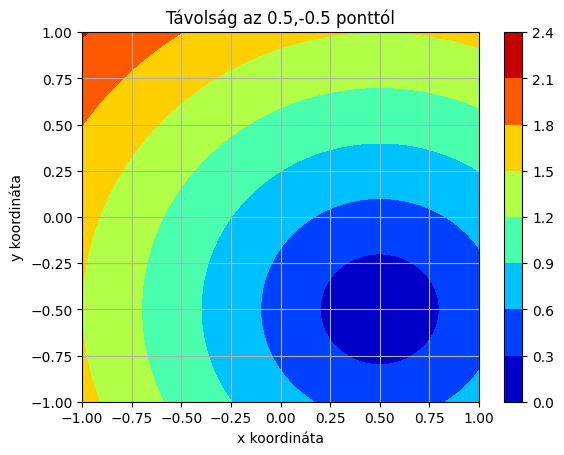

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
x = np.arange(-1, 1.02, 0.02)
y = np.arange(-1, 1.02, 0.02)
x_coordinate, y_coordinate = np.meshgrid(x, y,indexing="ij")
X0,Y0 = 0.5, -0.5
distance = np.sqrt((x_coordinate-X0)** 2 + (y_coordinate-Y0)**2)
plt.contourf(x_coordinate, y_coordinate, distance, cmap = 'jet')
plt.xlabel('x koordináta')
plt.ylabel('y koordináta')
plt.title(f'Távolság az {X0},{Y0} ponttól')
plt.grid(True)
plt.colorbar()
plt.show()


$\color{Blue}{Feladat: }$ Keressük meg a minimális távolságú pont indexét úgy, hogy először az x-tengely mentén megyünk végig és ott keresünk minimumot, majd a minimális x-hez tartozó y-tengely mentén keresünk minimumot!

In [ ]:
# Végigmegyünk az  0. soron, és megkeressük a minimális oszlop indexet
min_x_index = np.argmin(distance[:,0])
# Ezen az oszlopindexen végigmegyünk, hogy megkeressük a minimális távolsághoz tartozó sor indexet
min_y_index = np.argmin(distance[min_x_index,:])

# Minimális távolság értéke és koordinátái
min_distance = distance[min_x_index, min_y_index]
min_x = x_coordinate[min_x_index, min_y_index]
min_y = y_coordinate[min_x_index, min_y_index]

# Eredmény kiírása
print(f"A minimális távolság: {min_distance}")
print(f"A minimális távolságú pont koordinátái: ({min_x}, {min_y})")
print(f"A minimális távolságú pont indexe: ({min_x_index}, {min_y_index})")

A minimális távolság: 1.4043333874306805e-15
A minimális távolságú pont koordinátái: (0.5000000000000013, -0.49999999999999956)
A minimális távolságú pont indexe: (75, 25)


**További bemutató példa az `np.meshgrid` használatára**


Vektortér létrehozása és ábrázolása

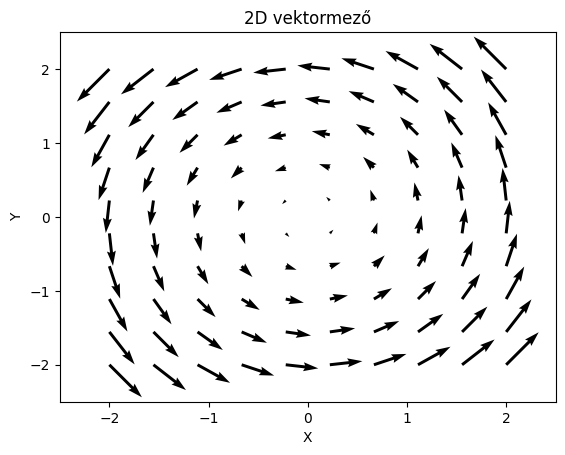

In [ ]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
U = -Y  # Példa vektorirány komponense
V = X   # Példa vektorirány komponense

plt.figure()
plt.quiver(X, Y, U, V)
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.title('2D vektormező')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


#**PFM_05_03 Térfogat meghatározása numerikus integrálással**#

A szimuláció során megbecsüljük a Balaton vízmennyiségét


Adatok:


*   Átlagos szélesség: 77 km,
*   Átlagos hossz: 7,7 km,
* Átlagos mélység: 3,3 m
* Mélyülés: a déli parton 500 méter után éri el a vízmélység az átlagos mélységet.


**Szeletelés**


[:gradual_depth_points]: Ezt szeletelésnek nevezzük Pythonban. Kiválasztja a depth_cross_section tömb egy részét. Ebben az esetben a tömb elejétől a gradual_depth_points által meghatározott indexig (de azt nem beleértve) lévő összes elemet kiválasztja.

$\color{Blue}{Részfeladat \space 1:} $ Hozzuk létre a Balatont szimuláló rácsot és ábrázoljuk a meder egy Észak-Dél irányú keresztmetszetét!

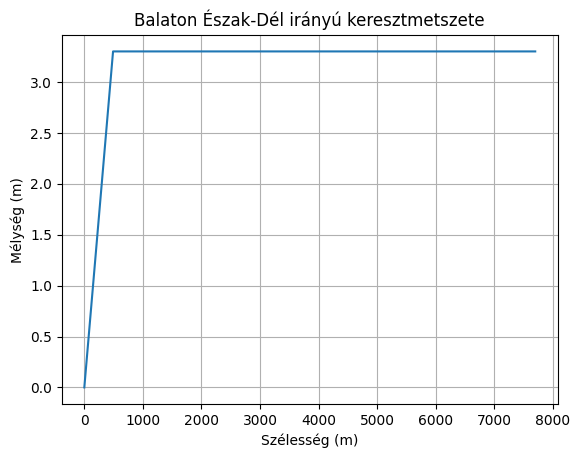

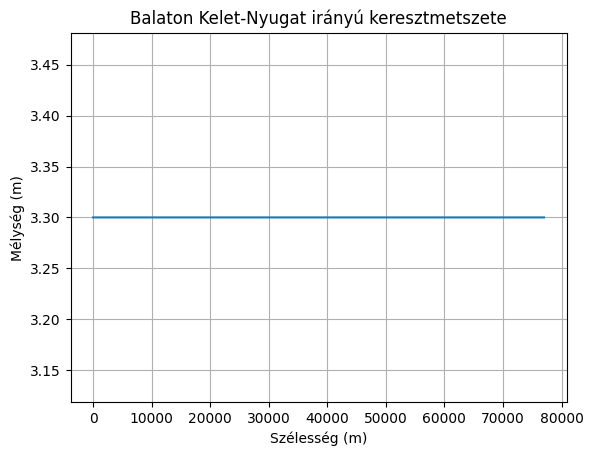

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Balaton paraméterei
width = 7700  # szélesség (m)
length = 77000 # hosszúság (m)
avg_depth = 3.3  # átlagos mélység (m)
gradual_depth_dist = 500  # fokozatos mélyülés távolsága (m)

# Koordináta-rács létrehozása
x = np.linspace(0, length, int(length / 10))
y = np.linspace(0, width, int(width / 10))
X, Y = np.meshgrid(x, y,indexing="ij")

# Mélységmodell létrehozása
depth_full= np.ones_like(X) * avg_depth
gradual_depth_points = int(gradual_depth_dist / 10) # fokozatos mélyülés pontjainak száma
depth_gradual = np.linspace(0, avg_depth, gradual_depth_points) # Mélységértékek a fokozatos mélyüléshez
depth_full[:, :gradual_depth_points] = depth_gradual  # Alkalmazza a mélységértékeket
plt.plot(y, depth_full[0,:])
plt.xlabel('Szélesség (m)')
plt.ylabel('Mélység (m)')
plt.title('Balaton Dél-Észak irányú keresztmetszete')
plt.grid(True)
plt.show()
plt.plot(x, depth_full[:,100])
plt.xlabel('Szélesség (m)')
plt.ylabel('Mélység (m)')
plt.title('Balaton Kelet-Nyugat irányú keresztmetszete')
plt.grid(True)
plt.show()


$\color{Blue}{Részfeladat \space 2:} $ Ábrázoljuk a modellt!

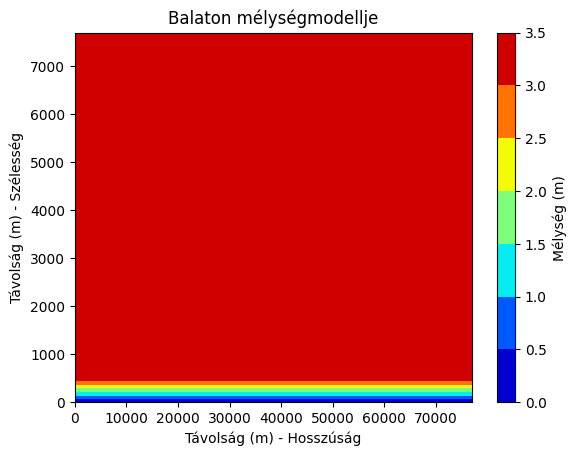

In [ ]:
# Teljes mélységmodell ábrázolása
plt.contourf(X, Y, depth_full, cmap='jet')
plt.colorbar(label='Mélység (m)')
plt.xlabel('Távolság (m) - Hosszúság')
plt.ylabel('Távolság (m) - Szélesség')
plt.title('Balaton mélységmodellje')
plt.show()

$\color{Blue}{Részfeladat \space 3:} $ Számoljuk ki a térfogatot!

In [ ]:
# Rácspontok területe
grid_area = 10 * 10  # 10 méteres felbontás mindkét irányban

# Térfogat számítása
volume = np.sum(depth_full) * grid_area

# Térfogat kiírása köbméterben és köbkilométerben
print(f"A Balaton térfogata: {volume:.2e} m³")
print(f"A Balaton térfogata: {volume / 1e9:.2f} km³")

A Balaton térfogata: 1.89e+09 m³
A Balaton térfogata: 1.89 km³


#**PFM_05_04 Vektortér integrálja felületre**#

$\color{Red}{Kérdés:}$ Mit kell figyelembe venni egy folyó vízhozamának számolásához?

Az alábbi alapadatokat fogjuk használni:



*   Maximális sebesség: $2 m/s$,
*   Mederszélesség: $1000 m$,
*   Medermagasság (mélység): $5 m$.




$\color{Red}{Kérdés: }$ Mi a célszerű első lépése a szimulációnak?



$\color{Blue}{Feladat :}$  Adjunk becslést a Tisza vízhozamára!

In [ ]:
estimated_yield = 1000 * 5*2
print(f"Becsült vízhozam, {estimated_yield}, m3/s")

Becsült vízhozam, 10000, m3/s


$\color{Red}{Kérdés: }$ Milyen vízszintes illetve függőleges sebességprofillal írható le a folyók vízhozama?

**Sebességprofil folyókban**

A folyók vízhozama jól közelíthető az alábbi profillal:


1.   Vízszintesen négyzetes profil,
2.   Függőlegesen logaritmikus profil.




**Négyzetes sebességprofil**

$$v(x) = v_0 \cdot \left( 1- \frac{2 \cdot x}{L}\right)^2$$

**Logaritmikus sebességprofil**


$$v(z) = \frac{log \frac{z+z_0}{z_0}}{log \frac{h+z_0}{z_0}}$$

$\color{Red}{Kérdések :}$




1.   Miért kell a képletben alkalmazni a $z_0$ mennyiséget és milyen értékre érdemes beállítani?
2.   Mi a képlet nevezőjének a szerepe a függőleges sebességprofil megadásában?



$\color{Blue}{Részfeladat 1:}$ Adjuk meg az alapadatokat, és hozzunk létre egy függvényt a sebességprofil számolására!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paraméterek
v_max = 2.0  # Maximális sebesség m/s
L = 1000  # Meder szélessége m
h = 5  # Meder magassága m
z_0 = 0.01  # Alsó határ (logaritmikus profilhoz)
n_points = 100  # Diszkrét pontok száma

# Sebességprofilok
# Függőleges sebességprofil (normalizált logaritmikus profil)
def v_z(z, v_max, h, z_0):
    # Normalizált logaritmikus sebesség, hogy a felszínen v_max legyen
    return np.sqrt(v_max) * (np.log((z + z_0) / z_0) / np.log((h + z_0) / z_0))

def v_x(x, L):
    return np.sqrt(v_max) * (1 - (2 * x / L - 1)**2)

# Keresztmetszeti sebességprofil
def velocity(x, z, v_max, L, h, z_0):
    return v_x(x, L) * v_z(z, v_max, h, z_0)


$\color{Blue}{Részfeladat2 : }$ Ábrázoljuk a vízszintes és függőleges sebességprofílokat illetve a keresztmetszeti sebességeloszlást!

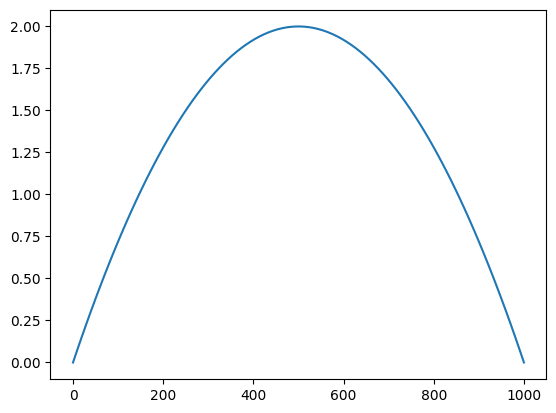

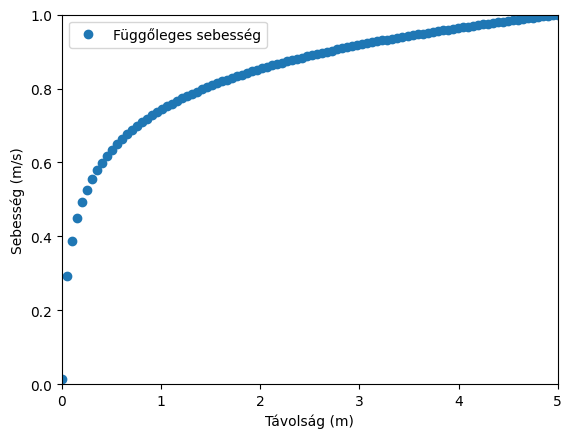

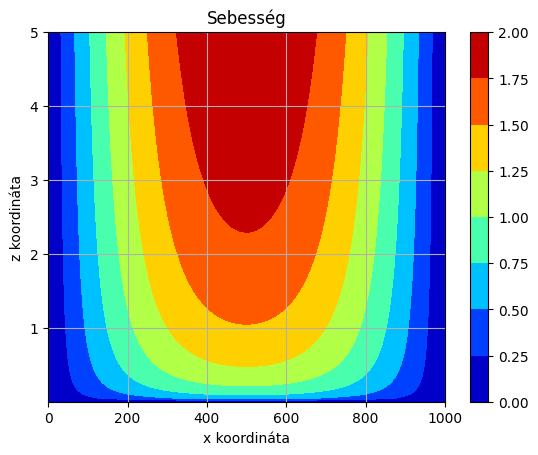

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Paraméterek
v_max = 2.0  # Maximális sebesség m/s
L = 1000  # Meder szélessége m
h = 5  # Meder magassága m
z_0 = 0.01  # Alsó határ (logaritmikus profilhoz)
n_points = 100  # Diszkrét pontok száma

# Sebességprofilok
# Függőleges sebességprofil (normalizált logaritmikus profil)
def v_z(z, h, z_0):
    # Normalizált logaritmikus sebesség, hogy a felszínen v_max legyen
    return np.log((z + z_0) / z_0) / np.log((h + z_0) / z_0)

def v_x(x, v_max, L):
    return v_max * (1 - (2 * x / L - 1)**2)

# Keresztmetszeti sebességprofil
def velocity(x, z, v_max, L, h, z_0):
    return v_x(x, v_max, L) * v_z(z, h, z_0)

x_vals = np.linspace(0, L, n_points)
z_vals = np.linspace(0.001, h, n_points)

horizontal_velocity = v_x(x_vals, v_max, L)
vertical_velocity = v_z(z_vals, h, z_0)
X, Z = np.meshgrid(x_vals, z_vals)
velocity_profile = velocity(X, Z, v_max, L, h, z_0)

plt.plot(x_vals, horizontal_velocity, label="Vízszintes sebesség")
plt.show()
plt.plot(z_vals, vertical_velocity, "o",label="Függőleges sebesség")
plt.xlim(0, h)
plt.ylim(0, 1)
plt.xlabel("Távolság (m)")
plt.ylabel("Sebesség (m/s)")
plt.legend()
plt.show()

plt.contourf(x_vals, z_vals, velocity_profile, cmap = 'jet')
plt.xlabel('x koordináta')
plt.ylabel('z koordináta')
plt.title(f'Sebesség')
plt.grid(True)
plt.colorbar()
plt.show()


$\color{Blue}{Részfeladat 3:}$ Számoljuk ki és irassuk ki a vízhozamot!

In [ ]:
dx = (L - 0) / (n_points - 1)
dz = (h - 0) / (n_points - 1)
integral = np.sum(velocity_profile) * dx * dz
print(f"A vízhozam: {integral:.2f} m^3/s")  # Kiírjuk a vízhozamot


A vízhozam: 5639.06 m^3/s


$\color{Red}{Kérdés :}$ Hogyan lehet értelmezni ezt az eredményt?